In [27]:
from selenium import webdriver
from bs4 import BeautifulSoup
import sqlite3
import time
import pandas as pd

In [28]:
driver = webdriver.Chrome('./chromedriver.exe')

In [29]:
driver.get('https://finance.naver.com/news/market_special.nhn?&page=1')

'<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"><head>\n\n\n\t\n\t\n\t\t\n\t\t\t\n\t\t\t\t<title>네이버 금융</title>\n\t\t\t\n\t\t\t\n\t\t\n\t\n\n\n\n\n\n\t\n\t\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t\n\n\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n\n\n\n\n\n\t\n\t\t<meta property="og:title" content="네이버 금융">\n\t\t<meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png">\n\t\t<meta property="og:url" content="https://finance.naver.com">\n\t\t<meta property="og:description" content="국내 해외 증시 지수, 시장지표, 펀드, 뉴스, 증권사 리서치 등 제공">\n    \n    \n\n<meta property="og:type" content="article">\n<meta property="og:article:thumbnailUrl" content="">\n<meta property="og:article:author" content="네이버금융">\n<meta property="og:article:author:url" con
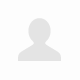
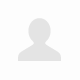

In [30]:
html = driver.page_source
html

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36" lang="ko"><head>
<title>네이버 금융</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버 금융" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="https://finance.naver.com" property="og:url"/>
<meta content="국내 해외 증시 지수, 시장지표, 펀드, 뉴스, 증권사 리서치 등 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버금융" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20210803162128/css/finance_header.css" rel="styl
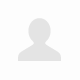
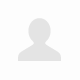

In [31]:
soup = BeautifulSoup(html, 'html.parser')
soup

In [32]:
names = soup.select('td.publicSubject')
names

[<td class="publicSubject">
 <a href="/news/market_special_read.nhn?article_id=0012593573&amp;office_id=001&amp;type=title&amp;keyword=" title="북한 한미연합훈련 맹비난에 경협주 하락(종합)">북한 한미연합훈련 맹비난에 경협주 하락(종합)</a>
 </td>,
 <td class="publicSubject">
 <a href="/news/market_special_read.nhn?article_id=0012593562&amp;office_id=001&amp;type=title&amp;keyword=" title="원티드랩, 코스닥 상장 첫날 '따상' 성공(종합)">원티드랩, 코스닥 상장 첫날 '따상' 성공(종합)</a>
 </td>,
 <td class="publicSubject">
 <a href="/news/market_special_read.nhn?article_id=0001873445&amp;office_id=016&amp;type=title&amp;keyword=" title="가비아 COM 도메인 다년 연장 이벤트">가비아 COM 도메인 다년 연장 이벤트</a>
 </td>,
 <td class="publicSubject">
 <a href="/news/market_special_read.nhn?article_id=0004952276&amp;office_id=277&amp;type=title&amp;keyword=" title="한솔로지스틱스, 해상운임 급등에 순익 8배…재평가 기대">한솔로지스틱스, 해상운임 급등에 순익 8배…재평가 기대</a>
 </td>,
 <td class="publicSubject">
 <a href="/news/market_special_read.nhn?article_id=0004690591&amp;office_id=014&amp;type=title&amp;keyword=" title="엔지켐생명과학, 경구형 코

In [33]:
name = names[int(0)]
name

<td class="publicSubject">
<a href="/news/market_special_read.nhn?article_id=0012593573&amp;office_id=001&amp;type=title&amp;keyword=" title="북한 한미연합훈련 맹비난에 경협주 하락(종합)">북한 한미연합훈련 맹비난에 경협주 하락(종합)</a>
</td>

In [34]:
title = name.select('a')[0].text.strip()
title

'북한 한미연합훈련 맹비난에 경협주 하락(종합)'

In [35]:
href = ('https://finance.naver.com' + name.select('a')[0]['href'])
href

'https://finance.naver.com/news/market_special_read.nhn?article_id=0012593573&office_id=001&type=title&keyword='

In [36]:
datetimes = soup.select('td.wdate')
datetimes

[<td class="wdate" style="text-align:center">21.08.11 15:39</td>,
 <td class="wdate" style="text-align:center">21.08.11 15:36</td>,
 <td class="wdate" style="text-align:center">21.08.11 14:38</td>,
 <td class="wdate" style="text-align:center">21.08.11 14:37</td>,
 <td class="wdate" style="text-align:center">21.08.11 14:19</td>,
 <td class="wdate" style="text-align:center">21.08.11 14:05</td>,
 <td class="wdate" style="text-align:center">21.08.11 13:52</td>,
 <td class="wdate" style="text-align:center">21.08.11 11:23</td>,
 <td class="wdate" style="text-align:center">21.08.11 10:47</td>,
 <td class="wdate" style="text-align:center">21.08.11 10:45</td>,
 <td class="wdate" style="text-align:center">21.08.11 10:43</td>,
 <td class="wdate" style="text-align:center">21.08.11 10:35</td>,
 <td class="wdate" style="text-align:center">21.08.11 10:34</td>,
 <td class="wdate" style="text-align:center">21.08.11 10:29</td>,
 <td class="wdate" style="text-align:center">21.08.11 10:26</td>,
 <td class

In [39]:
datetime = datetimes[int(0)]
datetime

<td class="wdate" style="text-align:center">21.08.11 15:39</td>

In [46]:
date = datetime.text.strip()[0:8]
date

'21.08.11'

In [41]:
time = datetime.text.strip()[-5:]
time

'15:39'

In [43]:
medias = soup.select('td.press')
medias

[<td class="press" style="text-align:center">연합뉴스</td>,
 <td class="press" style="text-align:center">연합뉴스</td>,
 <td class="press" style="text-align:center">헤럴드경제</td>,
 <td class="press" style="text-align:center">아시아경제</td>,
 <td class="press" style="text-align:center">파이낸셜뉴스</td>,
 <td class="press" style="text-align:center">이데일리</td>,
 <td class="press" style="text-align:center">이데일리</td>,
 <td class="press" style="text-align:center">아시아경제</td>,
 <td class="press" style="text-align:center">아시아경제</td>,
 <td class="press" style="text-align:center">파이낸셜뉴스</td>,
 <td class="press" style="text-align:center">아시아경제</td>,
 <td class="press" style="text-align:center">연합뉴스</td>,
 <td class="press" style="text-align:center">이데일리</td>,
 <td class="press" style="text-align:center">아시아경제</td>,
 <td class="press" style="text-align:center">아시아경제</td>,
 <td class="press" style="text-align:center">아시아경제</td>,
 <td class="press" style="text-align:center">아시아경제</td>,
 <td class="press" style="text-alig

In [44]:
media = medias[int(0)]
media

<td class="press" style="text-align:center">연합뉴스</td>

In [45]:
magazine = media.text.strip()
magazine

'연합뉴스'

In [47]:
driver.get('https://finance.naver.com/news/market_special_read.nhn?article_id=0012593573&office_id=001&type=title&keyword=')

'<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"><head>\n\n\n\t\n\t\n\t\t\n\t\t\t\n\t\t\t\t<title>네이버 금융</title>\n\t\t\t\n\t\t\t\n\t\t\n\t\n\n\n\n\n\n\t\n\t\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t\n\n\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n\n\n\n\n\n\t\n\t\t<meta property="og:title" content="네이버 금융">\n\t\t<meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png">\n\t\t<meta property="og:url" content="https://finance.naver.com">\n\t\t<meta property="og:description" content="국내 해외 증시 지수, 시장지표, 펀드, 뉴스, 증권사 리서치 등 제공">\n    \n    \n\n<meta property="og:type" content="article">\n<meta property="og:article:thumbnailUrl" content="">\n<meta property="og:article:author" content="네이버금융">\n<meta property="og:article:author:url" con
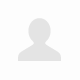
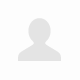

In [48]:
in_html = driver.page_source
in_html

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36" lang="ko"><head>
<title>네이버 금융</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버 금융" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="https://finance.naver.com" property="og:url"/>
<meta content="국내 해외 증시 지수, 시장지표, 펀드, 뉴스, 증권사 리서치 등 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버금융" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20210803162128/css/finance_header.css" rel="styl
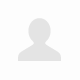
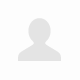

In [50]:
in_soup = BeautifulSoup(in_html,'html.parser')
in_soup

In [52]:
for tag in in_soup.find_all(['li', 'h3']):
    tag.replace_with('')

In [54]:
date = in_soup.select('span.article_date')[0].text.strip()
date

'2021-08-11'

In [57]:
content = in_soup.select('div.articleCont')[0].text.strip()
content

'[그래픽] 최근 남북관계 주요 일지(서울=연합뉴스) 이재윤 기자 = 김영철 노동당 통일전선부장은 11일 조선중앙통신을 통해 담화를 내고 한미연합훈련 사전연습 개시에 연이틀 반발하며 대가를 치를 것이라고 경고하고 나섰다.yoon2@yna.co.kr    트위터 @yonhap_graphics  페이스북 tuney.kr/LeYN1(서울=연합뉴스) 박진형 기자 = 북한이 한미연합훈련을 강력히 비난, 남북 관계가 경색되면서 남북 경제협력 관련 종목들이 11일 일제히 약세를 보였다.    이날 유가증권시장에서 남해화학은 전날보다 8.26% 떨어진 1만1천100원에 거래를 마쳤다.    또 재영솔루텍(-6.36%), 팬스타엔터프라이즈(-6.10%), 신원우(-5.94%), 신원(-4.93%), 푸른기술(-4.89%) 등도 하락 마감했다.    남해화학은 농업 분야 경협 테마주로 꼽히며, 재영솔루텍·신원은 개성공단 입주사다.    푸른기술은 남북 철도연결 테마주로, 팬스타엔터프라이즈는 북한 관광 관련주로 각각 거론된다.    앞서 전날 한미 군사 당국이 연합훈련 사전연습에 돌입하자 북한은 김여정 노동당 부부장이 담화에서 "반드시 대가를 치르게 될 자멸적인 행동"이라며 "남조선 당국자들의 배신적인 처사에 강한 유감을 표한다"고 비난했다.    또 공동연락사무소 채널과 군 통신선 정기통화에 응답하지 않아 남북 연락채널이 전격 복원된 지 2주 만에 다시 불통 상태에 놓였다.    이날도 김영철 노동당 통일전선부장이 담화에서 "잘못된 선택으로 인해 스스로가 얼마나 엄청난 안보 위기에 다가가고 있는가를 시시각각으로 느끼게 해줄 것"이라고 주장했다.    jhpark@yna.co.kr        jhpark@yna.co.kr'